准确率： 1.0


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

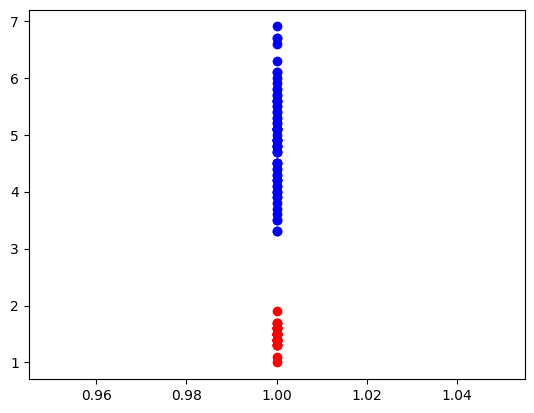

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X = iris.data[:, [2, 3]]  # 使用花瓣长度和宽度作为特征
y = iris.target

# 将标签转换为二进制形式
y = np.where(y == 0, 1, 0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 定义阈值逻辑单元
def tlu(X, w):
    z = np.dot(X, w)
    return np.where(z >= 0, 1, 0)

# 训练模型
eta = 0.1  # 学习率
n_iterations = 10  # 迭代次数
m = len(X_train)  # 样本数量
w = np.zeros(X_train.shape[1] + 1)  # 初始化权重

X_train = np.c_[np.ones(len(X_train)), X_train]  # 增加偏置项
X_test = np.c_[np.ones(len(X_test)), X_test]  # 增加偏置项

for iteration in range(n_iterations):
    for i in range(m):
        xi = X_train[i]
        yi = y_train[i]
        zi = tlu(xi, w)
        error = yi - zi
        w += eta * error * xi

# 测试模型
y_pred = tlu(X_test, w)
accuracy = np.mean(y_pred == y_test)
print("准确率：", accuracy)

# 可视化结果
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Iris-Setosa')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Iris-Versicolor')
plt.xlabel


In [ ]:
from sklearn.linear_model import Perceptron
# 加载数据集
iris = load_iris()
X = iris.data[:, (2, 3)]  # 使用花瓣长度和宽度作为特征
y = (iris.target == 0).astype(np.int) #iris setosa?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

<ipython-input-5-0fe5766229c2>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #iris setosa?
